In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential



In [2]:
tf.__version__

'2.14.0'

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
[224,224]+[3]

[224, 224, 3]

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob('Datasets/train/*')

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp\ipykernel_6932\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 15s 8s/step - loss: 3.8083 - accuracy: 0.3438 - val_loss: 10.6550 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 10.7795 - accuracy: 0.3906 - val_loss: 6.3986 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 8.3863 - accuracy: 0.3125 - val_loss: 5.0941 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 4.9273 - accuracy: 0.3281 - val_loss: 5.3075 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 7s 5s/step - loss: 2.9238 - accuracy: 0.4531 - val_loss: 4.2238 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 2.7613 - accuracy: 0.3906 - val_loss: 1.8215 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 7s 5s/step - loss: 2.3010 - accuracy: 0.4531 - val_loss: 2.1397 - val_accuracy: 0.5690
Epoch 8/50
2/2 [======================

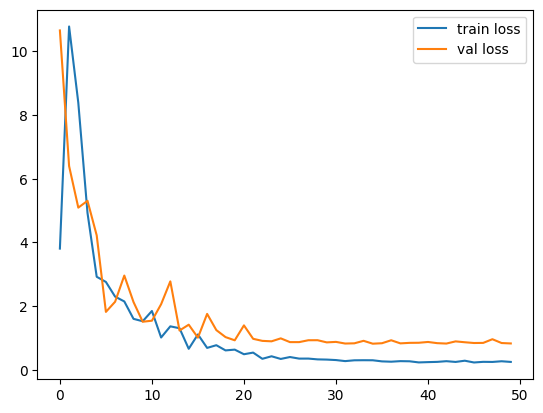

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

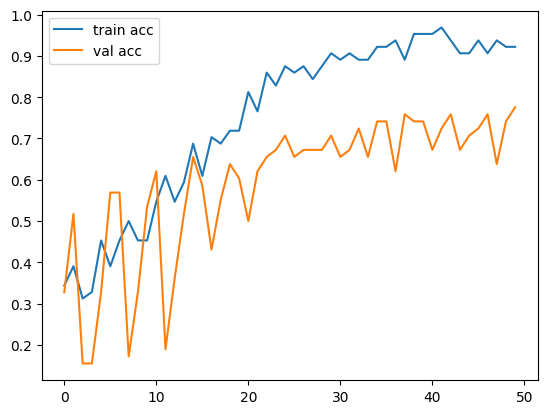

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
model.save('model_resnet50.keras')

In [19]:
y_pred = model.predict(test_set)

2/2 [==============================] - 5s 1s/step


In [20]:
y_pred

array([[4.86772656e-02, 4.70976949e-01, 4.80345845e-01],
       [6.56055748e-01, 3.36831748e-01, 7.11253332e-03],
       [1.70490785e-05, 1.29570882e-03, 9.98687208e-01],
       [6.65683970e-02, 9.06961262e-01, 2.64703929e-02],
       [1.38025843e-02, 9.41137850e-01, 4.50595617e-02],
       [5.55808516e-03, 9.79265213e-01, 1.51767200e-02],
       [5.90483807e-02, 4.28583384e-01, 5.12368262e-01],
       [4.36910465e-02, 3.49524200e-01, 6.06784821e-01],
       [1.98769227e-01, 4.94569808e-01, 3.06661010e-01],
       [1.33372527e-02, 9.13855016e-01, 7.28076398e-02],
       [8.66476726e-03, 4.04823162e-02, 9.50852931e-01],
       [7.27140382e-02, 4.72051173e-01, 4.55234826e-01],
       [1.59716129e-01, 3.21456999e-01, 5.18826842e-01],
       [2.30784882e-02, 8.25596787e-03, 9.68665600e-01],
       [8.33159149e-01, 1.04827315e-01, 6.20135479e-02],
       [2.88068593e-01, 3.34588230e-01, 3.77343208e-01],
       [2.48303823e-02, 2.52542943e-01, 7.22626746e-01],
       [5.20782888e-01, 2.34508

In [21]:
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

#0 for audi
#1 for lamborghini
#2 for mercedes

array([2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1,
       1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [23]:
from keras.models import load_model
from keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.keras')

In [25]:
img=image.load_img('Datasets/Test/mercedes/34.jpg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)

In [27]:
x

array([[[  9.,   9.,   7.],
        [  9.,   9.,   7.],
        [  9.,   9.,   7.],
        ...,
        [113., 106., 100.],
        [ 88.,  81.,  75.],
        [161., 156., 153.]],

       [[  9.,   9.,   7.],
        [  9.,   9.,   7.],
        [  9.,   9.,   7.],
        ...,
        [165., 158., 150.],
        [126., 119., 113.],
        [159., 154., 151.]],

       [[  9.,   9.,   7.],
        [  9.,   9.,   7.],
        [  9.,   9.,   7.],
        ...,
        [165., 158., 150.],
        [126., 119., 113.],
        [159., 154., 151.]],

       ...,

       [[ 24.,  29.,   7.],
        [ 26.,  31.,   8.],
        [ 27.,  32.,   9.],
        ...,
        [ 31.,  35.,   8.],
        [ 31.,  35.,   8.],
        [ 30.,  34.,   7.]],

       [[ 24.,  29.,   7.],
        [ 26.,  31.,   8.],
        [ 27.,  32.,   9.],
        ...,
        [ 31.,  35.,   8.],
        [ 31.,  35.,   8.],
        [ 30.,  34.,   7.]],

       [[ 23.,  28.,   6.],
        [ 25.,  30.,   7.],
        [ 27.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255
x

array([[[0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.44313726, 0.41568628, 0.39215687],
        [0.34509805, 0.31764707, 0.29411766],
        [0.6313726 , 0.6117647 , 0.6       ]],

       [[0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.64705884, 0.61960787, 0.5882353 ],
        [0.49411765, 0.46666667, 0.44313726],
        [0.62352943, 0.6039216 , 0.5921569 ]],

       [[0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.64705884, 0.61960787, 0.5882353 ],
        [0.49411765, 0.46666667, 0.44313726],
        [0.62352943, 0.6039216 , 0.5921569 ]],

       ...,

       [[0.09411765, 0.11372549, 0.02745098],
        [0.10196079, 0.12156863, 0.03137255],
        [0.10588235, 0

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.0105366 , 0.00622171, 0.9832417 ]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 126ms/step


array([2], dtype=int64)